# Do Kenny's Deaths Reflect the United States' Fears?

**Author:** Eloïse Delerue

**Date:** January 30th, 2024

## 1. Introduction

Since its debut in 1997, the satirical television series South Park follows the United States' society evolutions through the eyes of four young boys, dealing with hot topics. One of its main characters, Kenny, has the characteristic of dying several times in the course of the series, often in absurd ways, but also of realistic deaths such as deaths by firearm, which have been on rise for two decades in the United States (Pew Research Center, 2021).

**Could Kenny's deaths by firearm follow the increasing tendency of gun deaths in the United States?**

*We anticipate that if this is the case, we should observe an increase in firearm deaths over time for Kenny.*

## 2. Library Import

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## 3. Data Import

In [14]:
df = pd.read_csv("OhMyGodTheyKilledKenny.csv")
display(df)

,Season,Year of Release,Episode Title,Description,Death Cause
0,1,1997,"""Cartman Gets an Anal Probe""","Blasted by the Visitors' UFO, trampled by a he...",UFO ; Firearm ; Trampled
1,1,1997,"""Weight Gain 4000""",Gets crushed by a prop during the school play....,Crushed
2,1,1997,"""Weight Gain 4000""",Shot by Mr. Garrison when trying to shoot Kath...,Impaled ; Firearm
3,1,1997,"""Volcano""",Kenny seemingly gets crushed by a large volcan...,Volcano ; Crushed ; Burned/burst
4,1,1997,"""Volcano""",He is later seen alive after the lava travels ...,Firearm
...,...,...,...,...,...
97,17,2013,"""Titties and Dragons""","Dressed as Princess Kenny, he jumps out of the...",Defenestration
98,21,2017,"""Put It Down""",Shown via a photograph as one of the kids who ...,Others
99,22,2018,"""Bike Parade""",Gets killed by Alexa offscreen under Jeff Bezo...,Unknown
100,24,2020,"""The Pandemic Special""",Shot by Harrison Yates' tank while running awa...,Firearm


## 4. Data Manipulation

In [15]:
# Counting item by category
wip1 = df.groupby('Year of Release')['Death Cause'].agg(['count']).reset_index()

# Adding missing years to the table
wip2 = pd.DataFrame({'Year of Release': range(1997, 2022)})

# Merging the two previous tables
per_year = pd.merge(wip2, wip1, on='Year of Release', how='left')
per_year['count'].fillna(0, inplace=True)
per_year['count'] = per_year['count'].astype(int)

In [16]:
# This function adds rows to the table by separating the different deaths
def deaths_splitter(df, death_cause):
    splitted_deaths = []

    for index, row in df.iterrows():
        deaths = row[death_cause].split(';')

        for death in deaths:
            splitted_death = dict(row)
            splitted_death[death_cause] = death.strip()
            splitted_deaths.append(splitted_death)

    new_df = pd.DataFrame(splitted_deaths)
    
    return new_df

# Splitting the original table
df_split = deaths_splitter(df, 'Death Cause')

In [17]:
# Counting deaths by category
cause = df_split['Death Cause'].value_counts()

In [18]:
# Focusing on deaths by firearm
firearm = df_split[df_split['Death Cause'] == 'Firearm']
firearm = firearm.groupby('Year of Release')['Death Cause'].agg(['count']).reset_index()

## 5. Data Description

c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

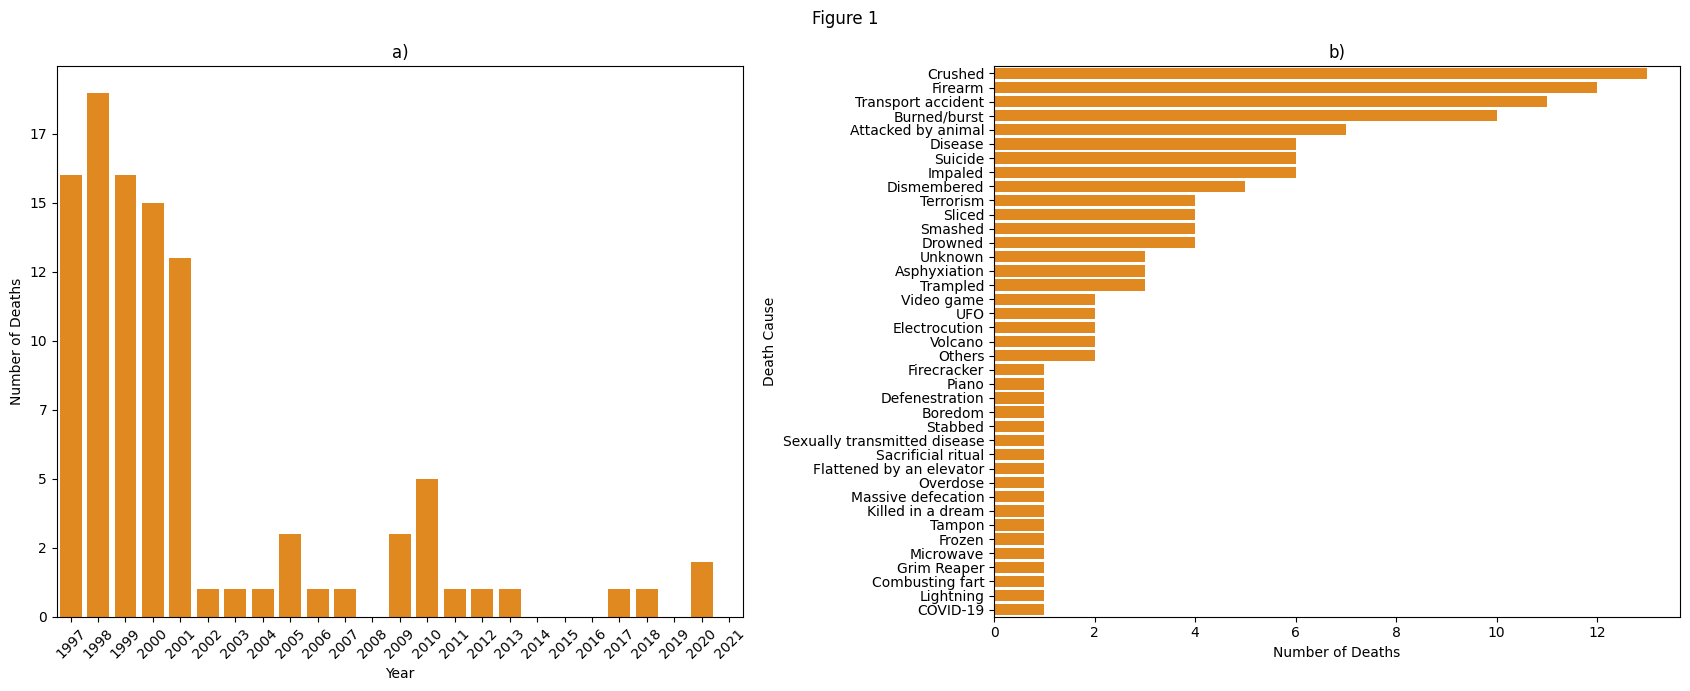

In [19]:
fig1 = plt.figure(figsize = (17, 7))
fig1.suptitle("Figure 1")

# Figure 1.a: Number of Deaths by Cause (non-splitted) depending on Year
plt.subplot(1, 2, 1) 
sns.barplot(x = per_year['Year of Release'], y = per_year['count'], color = "darkorange")
plt.gca().set_xlabel("Year")
plt.xticks(rotation=45)
plt.gca().set_ylabel("Number of Deaths")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:d}'.format(int(x))))
plt.title("a)")

# Figure 1.b: Number of Deaths (splitted) depending on Cause
plt.subplot(1, 2, 2) 
sns.barplot(x = cause.values, y = cause.index, color = "darkorange")
plt.gca().set_xlabel("Number of Deaths")
plt.gca().set_ylabel("Death Cause")
plt.title("b)")

plt.tight_layout()
plt.savefig('OhMyGodTheyKilledKenny_1.jpg') 
plt.show()

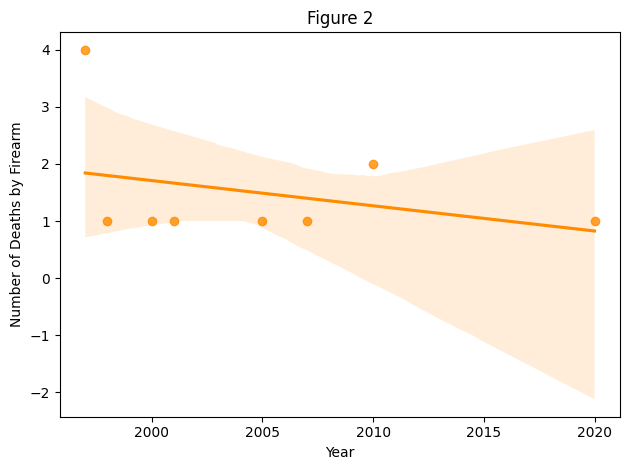

In [20]:
# Figure 2: Regplot of the Nunmber of Deaths by Firearm depending on Year
sns.regplot(x=firearm['Year of Release'], y=firearm['count'], color = "darkorange", line_kws = {"color": "darkorange"})
plt.gca().set_xlabel("Year")
plt.gca().set_ylabel("Number of Deaths by Firearm")
plt.title("Figure 2")

plt.tight_layout()
plt.savefig('OhMyGodTheyKilledKenny_2.jpg')
plt.show()

## 6. Data Modelling

In [21]:
model = smf.ols(formula = 'count ~ Q("Year of Release")', data = firearm).fit()
model.summary()

c:\Users\elois\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                    0.6621
Date:                Tue, 30 Jan 2024   Prob (F-statistic):              0.447
Time:                        16:28:44   Log-Likelihood:                -10.933
No. Observations:                   8   AIC:                             25.87
Df Residuals:                       6   BIC:                             26.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               90.0534    108.827      0.827      0.440    -176.237     356.344
Q("Year of Release")    -0.0442      0.054     -0.814      0.447      -0.177       0.089
==============================================================================
Omnibus:                        7.177   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                2.455
Skew:                           1.331   Prob(JB):                        0.293
Kurtosis:                       3.529   Cond. No.                     5.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 7. Results

Deaths by firearm seem to decrease over time ($\beta = -0.0442$, see **Figure 2**). However, this is not significant, and the model only explains few variations of the data ($R^2 = 0.099$, $p = 0.447$).

## 8. Conclusion

The results are not significant enough to conclude on the relationship between the number of deaths by firearm and time; it can however be explained by the fact that Kenny dies much less from season 6 onwards, after a choice of the producers.

Among further studies, it would be interesting to see if the frequency of firearm use, regardless of Kenny's deaths, follows an increasing tendency over the course of the series.